## NBA Statistics Friday Project: Classification of Shot Distances

##### This is a project to assess if the NBA's classification of shot distances is good. Currently the categories are: <5 ft, 5-9 ft, 10-14 ft, 15-19 ft, 20-24 ft, and 25-29 ft. These classifications could help us better understand the categories of the types of shots taken by distance. We're going to use only shots that were made so we classify shot distances of shots that were completed at a statistically high rate in the NBA.

In [39]:
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
from scipy import stats
from sklearn.cluster import DBSCAN

In [40]:
playbyplayData = pd.read_csv("/Users/dereklee/ml-projects/NBA-PBP-2018-2019.csv")
playbyplayData.head(5)

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,720,PHI,Jump ball: J. Embiid vs. A. Horford (B. Simmon...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J. Embiid - PHI,A. Horford - BOS,B. Simmons
1,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,R. Covington misses 3-pt jump shot from 27 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,700,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,675,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,673,PHI,Defensive rebound by D. Saric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
playbyplayData = playbyplayData[playbyplayData.ShotOutcome != "miss"]

In [42]:
playbyplayData.shape

(487325, 40)

In [43]:
playbyplayData = playbyplayData.dropna(subset = ["ShotOutcome"])

In [44]:
playbyplayData.head(10)

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
8,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,655,PHI,J. Embiid makes 2-pt layup from 1 ft (assist b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,559,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,533,PHI,D. Saric makes 2-pt layup from 2 ft (assist by...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,508,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,495,PHI,D. Saric makes 2-pt layup from 4 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,461,PHI,J. Embiid makes 2-pt jump shot from 14 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,446,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,370,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,341,PHI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,/boxscores/201810160BOS.html,regular,TD Garden Boston Massachusetts,October 16 2018,8:00 PM,BOS,1,290,PHI,B. Simmons makes 2-pt layup from 1 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
playbyplayData = playbyplayData.dropna(subset = ["ShotDist"])

In [46]:
playbyplayData.shape

(107373, 40)

Play by Play data is now cleaned to remove any missed shots and missing values. Let's parse the distances.

In [47]:
playbyplayData.columns

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss'],
      dtype='object')

In [10]:
shotDistances = playbyplayData['ShotDist']
shotDistances

8          1.0
26        15.0
30         2.0
33        13.0
34         4.0
          ... 
613623     9.0
613633    13.0
613634    25.0
613645     1.0
613648    13.0
Name: ShotDist, Length: 107373, dtype: float64

In [11]:
shotDistances.max() # LOL Steph Curry

60.0

In [25]:
shotDistances.min()

0.0

In [12]:
cleanDist = shotDistances.to_numpy().reshape(-1, 1)

In [1]:
## Seeing if the > 30 ft makes sense

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# playbyplayData[playbyplayData['ShotDist'] >= 30]

### Bins using Freedman-Diaconis Rule

In [22]:
def freedman_diaconis(data, returnas = "width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype = np.float_)
    IQR = stats.iqr(data, rng = (25,75), scale = "raw", nan_policy = "omit")
    N = data.size
    bw = (2*IQR)/ np.power(N,1/3)

    if returnas == "width":
        result = bw
    else:
        datmin,datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng/bw) + 1)

    return(result)

In [24]:
freedman_diaconis(data = cleanDist, returnas = "bins")

68

### Histogram with 68 bins
With 68 bins, you'll notice the data nicely gets grouped into 5 larger overall groups. I'd like to think that you could use this as a fair breakdown of the shot distance groups. With that being said, you'll notice the shot distances can be grouped as: **0-7ft**, **8-14ft**, **15-22ft**, **23-29ft**, and **30+ft**

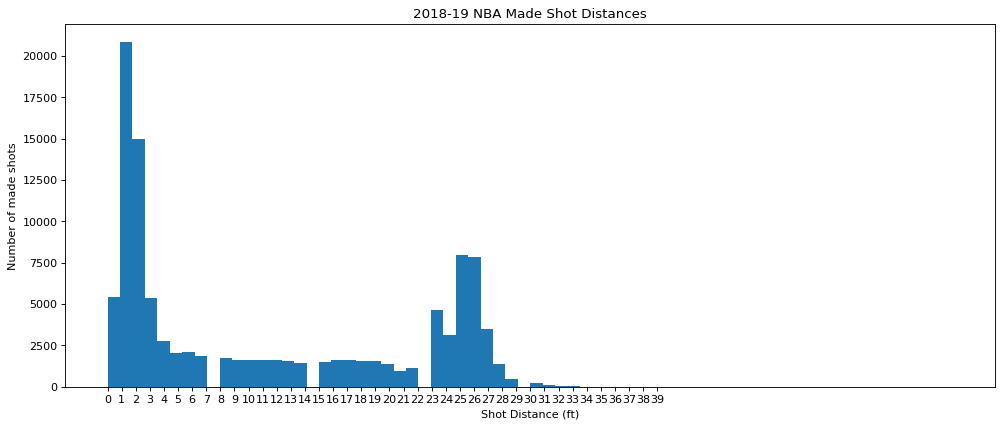

In [65]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('2018-19 NBA Made Shot Distances')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Number of made shots')
plt.hist(cleanDist, bins = 68)
plt.xticks(np.arange(0, 40, step=1))
plt.show()


### With our new groupings of shot distances, what's the next step?
We can take a number of approaches here.  
1) Look at NBA players and identify which bucket of distances they are most successfull at shooting in. This could mean the % of makes at each distance bucket too.  
2) Look at NBA offenses and identify where most of their makes are falling in perhaps using the above histogram on a team by team basis. This season data shows us that basically there's an over-reliance of shots in the paint and 3 point shots in the NBA. Let's use the histogram to figure out where each team likes to shoot (shot selection).

I think perhaps the way to go is option 2 and then find players that fit that profile (option 1). So both!

In [124]:
X = shotDistances.to_numpy()
X = X.reshape(-1, 1)

In [145]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
    plt.title("DBSCAN")

In [147]:
# dbscan(X, eps = 0.5, min_samples = 2)

IndexError: index 1 is out of bounds for axis 1 with size 1